# `LynneSim`: A Simple Tool to Investigate Trading LSST Survey Area and Depth

<br>Owner(s): **Phil Marshall** ([@drphilmarshall](https://github.com/LSSTScienceCollaborations/survey_strategy_wp/issues/new?body=@drphilamrshall))
<br>Last Verified to Run: **2018-09-19**

Teams writing white papers may well need to make rough estimates of the cost of various high level decisions that could be taken about the LSST observing strategy, such as how deep to go in various sky regions. `LynneSim` is a simple tool to enable such calculations.

> The "owner" of a notebook is the person you can contact, e.g. by GitHub issue, if the notebook doesn't run. 

### Learning Objectives:

After working through this tutorial you should be able to use `LynneSim` to emulate (very approximately) an OpSim run followed by a (very basic) MAF analysis.

### Logistics
This notebook is intended to be runnable anywhere, with only standard dependencies.

## Set-up

In [70]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Getting Started

Suppose we want to know how many visits per field, and hence the 5-sigma depth, we could get, if we put the standard number of visits in the usual WFD region, and then split the remainder over the rest of our "big sky" (-90 to +32 deg) - and don't do any DDFs or mini-surveys at all. One (more complicated) way to answer this question is to ask Lynne Jones to configure and run OpSim, and then do a MAF analysis. HOWEVER, We can get an approximate answer with a very simple emulator of Lynne Jones that will help make sure that we're asking for reasonable options.

In [71]:
from lynnesim import LynneSim 

In [72]:
Lynne = LynneSim()
help(Lynne)

Assuming a total number of visits 2600000 and that we will use 0.900000 of them:
The number of visits available for use is 2340000 (2.34M)
Help on LynneSim in module lynnesim object:

class LynneSim(builtins.object)
 |  Worker class for estimating approximate LSST number of visits, depth etc in a mock proposal-based LSST
 |  survey campaign.
 |  
 |  Methods defined here:
 |  
 |  __init__(self, totalNvis=2600000, percentTotal=0.9)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  calculate_metrics(self)
 |      Compute depth per field, per filter.
 |      
 |      Notes
 |      =====
 |      Currently we assume non-overlapping regions...
 |  
 |  define_survey_region(self, name, limits=None, NvisitsPerField=None, fractions=None)
 |      Extract a subset of the fields, within the given spatial limits.
 |      Note that various regions can overlap!
 |      
 |      Parameters
 |      ==========
 |      name: string
 |          The name of the survey region 

In [73]:
print(len(Lynne.fields))
Lynne.fields[0:5]

5292


,fieldId,fov,ra,dec,gl,gb,el,eb
0,1,3.5,0.000000,-90.000000,-57.068082,-27.128251,-89.931210,-66.561358
1,2,3.5,180.000000,-87.568555,-57.663825,-24.756541,-96.024547,-66.442665
2,3,3.5,324.000429,-87.568550,-54.980423,-28.712449,-85.262622,-65.058907
3,4,3.5,35.999571,-87.568550,-58.164147,-29.359810,-84.695237,-67.907706
4,5,3.5,252.001105,-87.568547,-54.748581,-25.862125,-91.659618,-64.238559


In [74]:
# %load -n LynneSim.__init__

## Configuring the Observing Strategy



Assuming a total number of visits 2600000 and that we will use 0.990000 of them:
The number of visits available for use is 2574000 (2.57M)
Defined survey region WFD
  with 2290 fields in the selected footprint
  with 825 visits per field
  with filter balance: {'u': 0.16666666666666666, 'g': 0.16666666666666666, 'r': 0.16666666666666666, 'i': 0.16666666666666666, 'z': 0.16666666666666666, 'y': 0.16666666666666666}
Defined survey region GalacticPlaneCenter
  with 449 fields in the selected footprint
  with 825 visits per field
  with filter balance: {'u': 0.16666666666666666, 'g': 0.16666666666666666, 'r': 0.16666666666666666, 'i': 0.16666666666666666, 'z': 0.16666666666666666, 'y': 0.16666666666666666}
Defined survey region NES
  with 291 fields in the selected footprint
  with 255 visits per field
  with filter balance: {'u': 0.16666666666666666, 'g': 0.16666666666666666, 'r': 0.16666666666666666, 'i': 0.16666666666666666, 'z': 0.16666666666666666, 'y': 0.16666666666666666}
Defined su

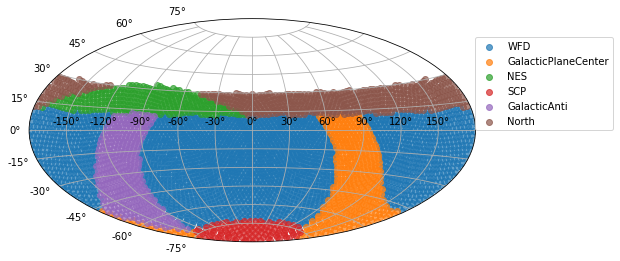

In [75]:
from lynnesim import LynneSim 
Lynne = LynneSim(percentTotal=.99)
Lynne.define_survey_region('WFD', NvisitsPerField=825, limits={'dec':[-72.25,12.4], 'gb':[15.0,-15.0]})
Lynne.define_survey_region('GalacticPlaneCenter', NvisitsPerField=825,
                           limits={'gb':[-15.0, 15.0], 'gl':[-70.0, 90.0],'dec':[-90.0,12.4]})
Lynne.define_survey_region('NES', NvisitsPerField=255,
                          limits={'dec':[12.4, 90], 'eb':[-15, 10]})
Lynne.define_survey_region('SCP', NvisitsPerField=200,
                          limits={'dec':[-90, -72.25], 'gb':[-90, -15]})
Lynne.define_survey_region('GalacticAnti', 
                          limits={'gb':[-15.0, 15.0], 'gl':[90.0, -70.0], 'dec':[-90.0,12.4]})
Lynne.define_survey_region('North',
                          limits={'dec':[12.4, 30], 'eb':[10, 90]})
#Lynne.define_survey_region('DD', NvisitsPerField=364000)
fig = Lynne.plot_sky_map()

In [76]:
# %load -n LynneSim.define_survey_region

## Emulating an OpSim Run

In [77]:
footprint  = Lynne

In [78]:
footprint.distribute_visits()

Assigned 1889250 visits to WFD (825 visits/field * 2290 fields)
Assigned 370425 visits to GalacticPlaneCenter (825 visits/field * 449 fields)
Assigned 74205 visits to NES (255 visits/field * 291 fields)
Assigned 22600 visits to SCP (200 visits/field * 113 fields)
Assigned 2356480 visits based on NvisitsPerField values to each of ['WFD', 'GalacticPlaneCenter', 'NES', 'SCP']
Assigned 216908 visits based on even split between 844 fields in regions ['GalacticAnti', 'North'] (257 per field)
This leaves about 612 visits out of candidate 2574000 remaining.
 (or that these surveys required 0.99 of all the original visits.


In [79]:
footprint.NvisitsPerField

{'WFD': 825,
 'GalacticPlaneCenter': 825,
 'NES': 255,
 'SCP': 200,
 'GalacticAnti': 257,
 'North': 257}

In [80]:
footprint.regions['GalacticPlaneCenter'][-5:]

,fieldId,fov,ra,dec,gl,gb,el,eb,Nvis,Nvis_u,Nvis_g,Nvis_r,Nvis_i,Nvis_z,Nvis_y
3144,3145,3.5,276.720142,10.721601,39.799389,10.273644,-81.961872,33.974531,825,138,138,138,138,138,138
3146,3147,3.5,273.549618,11.035837,38.707173,13.214659,-85.706684,34.422444,825,138,138,138,138,138,138
3154,3155,3.5,302.450338,11.035896,52.044496,-11.865178,-52.327472,30.336690,825,138,138,138,138,138,138
3160,3161,3.5,305.583249,11.358250,53.978030,-14.315216,-48.798792,29.857832,825,138,138,138,138,138,138
3196,3197,3.5,288.000016,12.307010,46.208996,1.104928,-68.464123,34.413931,825,138,138,138,138,138,138


In [81]:
# %load -n LynneSim.distribute_visits

## Emulating a MAF Analysis

In [82]:
footprint.calculate_metrics()

In [83]:
# %load -n LynneSim.calculate_metrics

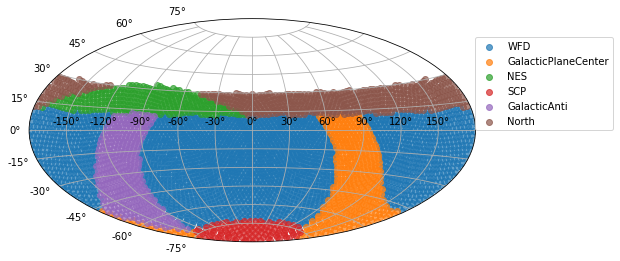

In [84]:
fig = footprint.plot_sky_map()

In [85]:
#fig = footprint.fancy_plot()

Defined survey region _all_nvisits
  with 5292 fields in the selected footprint
  (will decide total number of visits per field later)
  with filter balance: {'u': 0.16666666666666666, 'g': 0.16666666666666666, 'r': 0.16666666666666666, 'i': 0.16666666666666666, 'z': 0.16666666666666666, 'y': 0.16666666666666666}
WFD
GalacticPlaneCenter
NES
SCP
GalacticAnti
North


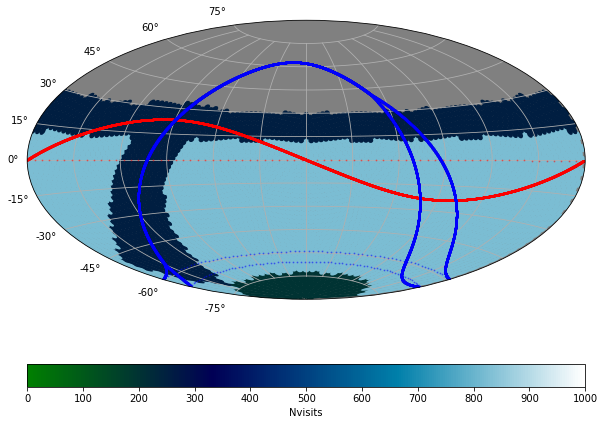

In [90]:
fig = footprint.fancy_plot_Nvisits(cmap='ocean')

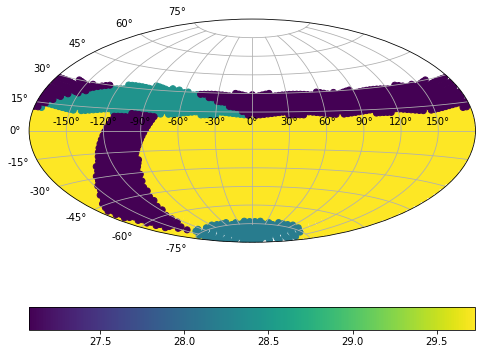

In [92]:
fig = Lynne.plot_sky_map(metric='depth_r')

In [ ]:
# %load -n LynneSim.plot_sky_map

## Further Work

It's not clear yet how useful the `LynneSim` abstraction will be: the area/depth tradeoff notebooks are better for understanding what is being calculated, because of their sequential nature. But, for carrying out a suite of (more than one or two) cheap experiments, it's going to be better to summon a `LynneSim` worker.

So far, the only metrics implemented are the depths by filter - there could be others that could be plausibly emulated. At some point we might want to abstract a metric object to enable easier implementation of additional metrics. Likewise, the survey regions may need a more careful treatment - at the moment overlapping fields are not treated well at all. 